# T-Test

In [1]:
# import pandas
import pandas as pd

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# import the function to calculate the power of test
from statsmodels.stats import power

### What is T-test ?

- The t test is another method of hypothesis testing that is used for a small sample size (n < 30). 
- A t-test is a statistical test that is used to compare the means of two groups.
- It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.
- It is also used to compare the sample mean and population mean. However, the population standard deviation is not known instead, the sample standard deviation is known. 


### Assumptions of t-test

1. Data are independent.
2. Data are (approximately) normally distributed.
3. Data have a similar amount of variance within each group being compared (a.k.a. homogeneity of variance)

### When to use a t-test

- A t-test can only be used when comparing the means of two groups (a.k.a. pairwise comparison). 
- If you want to compare more than two groups, or if you want to do multiple pairwise comparisons, use an ANOVA test or a post-hoc test.

  There are 3 types of t-tests that could be performed on the n number of samples collected.

- One-sample test,
- Independent sample t-test and
- Paired(Correlated) samples t-test

### 1. One-Sample T-Test 

- If there is one group being compared against a standard value (e.g. comparing the acidity of a liquid to a neutral pH of 7), perform a one-sample t-test.
- For comparing the mean of a population from n samples, with a specified theoretical mean μ, we use a one-sample t-test.

### 2.  Independent Sample T-Test

- If the groups come from two different populations (e.g. two different species, or people from two separate cities), perform a two-sample t-test (a.k.a. independent t-test).
- Students t-test is used to compare the mean of two groups of samples. It helps evaluate if the means of the two sets of data are statistically significantly different from each other.

### 3.  Paired(Correlated) Samples T-Test

- If the groups come from a single population (e.g. measuring before and after an experimental treatment)
- Whenever two distributions of the variables are highly correlated, they could be pre and post test results from the same people. In such cases, we use the paired samples t-test.

### 4.  Equal Variance (or Pooled) T-Test 

- The equal variance t-test is used when the number of samples in each group is the same, or the variance of the two data sets is similar. 

### 5. Unequal Variance T-Test 

- The unequal variance t-test is used when the number of samples in each group is different, and the variance of the two data sets is also different. 
- This test is also called the Welch's t-test.

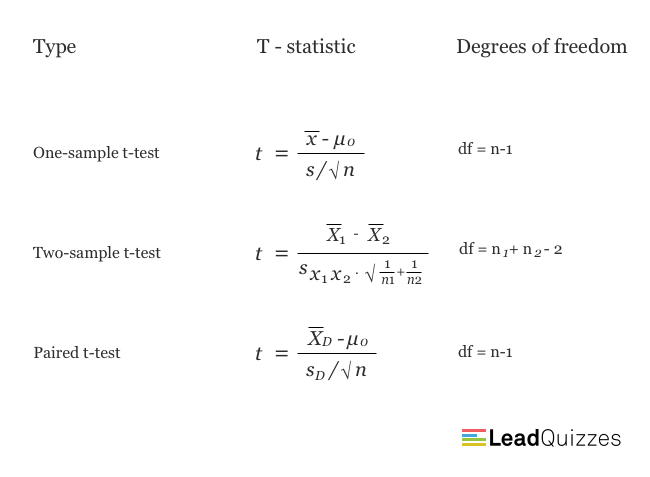

### One-tailed or two-tailed t-test?

- If you only care whether the two populations are different from one another, perform a two-tailed t-test.
- If you want to know whether one population mean is greater than or less than the other, perform a one-tailed t-test.

### T-Values and Degrees of Freedom 

The t-test produces two values as its output: t-value and degrees of freedom. 

- The t-value is a ratio of the difference between the mean of the two sample sets and the variation that exists within the sample sets.
- A large t-score indicates that the groups are different.
- A small t-score indicates that the groups are similar.

Degrees of freedom refers to the values in a study that has the freedom to vary and are essential for assessing the importance and the validity of the null hypothesis


### Examples of T-Test



### One tailed t-test

Example 1:
- The quality assurance department has collected 15 packets of potato chips. The department wants to test the average weight of the packets. Check whether they can use the one sample t-test for the population mean with 95% confidence.Test whether the average weight of packet is more than 30 g. using p-value method. (Use 10% level of significance)

pack_wt = [26.8, 29.6, 27.8, 31.2, 30.9, 27.1, 28, 28.6, 29.4, 29.3, 31.5, 32.4, 29.7, 28.1, 31.9]

In [2]:
pack_wt = [26.8, 29.6, 27.8, 31.2, 30.9, 27.1, 28, 28.6, 29.4, 29.3, 31.5, 32.4, 29.7, 28.1, 31.9]
print(pack_wt)

[26.8, 29.6, 27.8, 31.2, 30.9, 27.1, 28, 28.6, 29.4, 29.3, 31.5, 32.4, 29.7, 28.1, 31.9]


In [3]:
## Check for normality

alpha=0.05
stat, p_value = stats.shapiro(pack_wt)
print("p-value:",p_value)

if(p_value >= alpha):
    print("Follows Normal Distribution")
else:
    print("Does not follow normal distribution")

p-value: 0.5868644714355469
Follows Normal Distribution


In [4]:
#H0: mu = 30gm
#H1: mu > 30 gm

pop_mean=30
n=15
alpha=0.1

sample_mean=np.mean(pack_wt)
print("sample mean:",sample_mean)

sample_std=np.std(pack_wt)
print("sample_std:",sample_std)


t_score=(sample_mean-pop_mean)/(sample_std/np.sqrt(n))
print("t score:",t_score)

t_critical = stats.t.isf(q = alpha, df = n-1)
print("t critical:",t_critical)

## t-score < 0 ---> Lower tail test
## t-score > 0 ---> Upper tail test

if t_score < 0:
    p_value=stats.t.cdf(t_score,n-1) 
else:
    p_value = 1-stats.t.cdf(t_score,n-1)
    
print("p value:",p_value)   ## Upper tail test

# p-value approach

if(p_value <= alpha):
    print("p-value approach: Reject null hypothesis")
else:
    print("p-value approach: Fail to reject null hypothesis")

# Critical value approach

if(t_score >=t_critical):
    print("Critical value approach: Reject null hypothesis")
else:
    print("Critical value approach: Fail to  reject null hypothesis")

sample mean: 29.486666666666665
sample_std: 1.7142021143636725
t score: -1.159799905970342
t critical: 1.3450303744546486
p value: 0.1327641612060404
p-value approach: Fail to reject null hypothesis
Critical value approach: Fail to  reject null hypothesis


Conclusion:
- Claim that the average weight of packet is more than 30 g is FALSE.
    

Example 2:

- The orthopaedic surgeon states that a T-score for females older than 30 years is less than -1.2 which indicates the low bone density. To test the claim a sample of 10 women was selected and the average T-score was found to be -1.34 with a standard deviation of 0.8. Test the surgeon's claim using a critical value method with 95% confidence. (Assume the normality of the T-score).

In [5]:
#H0: mu =-1.2
#H1: mu < -1.2

pop_mean= -1.2
sample_std=0.8
n=10
sample_mean=-1.34
alpha=0.05
   
t_score=(sample_mean-pop_mean)/(sample_std/np.sqrt(n))
print("t score:",t_score)

t_critical = stats.t.isf(q = alpha, df = n-1)
print("t critical:",t_critical)

## t-score < 0 ---> Lower tail test
## t-score > 0 ---> Upper tail test

if t_score < 0:
    p_value=stats.t.cdf(t_score,n-1) 
else:
    p_value = 1-stats.t.cdf(t_score,n-1)

print("p value:",p_value) 

# p-value approach

if(p_value <= alpha):
    print("p-value approach: Reject null hypothesis")
else:
    print("p-value approach: Fail to reject null hypothesis")

# Critical value approach

if(t_score <= -t_critical):
    print("Critical value approach: Reject null hypothesis")
else:
    print("Critical value approach: Fail to  reject null hypothesis")

t score: -0.5533985905294669
t critical: 1.8331129326536337
p value: 0.29673469801808217
p-value approach: Fail to reject null hypothesis
Critical value approach: Fail to  reject null hypothesis


Conclusion:
- Claim that T-score for females older than 30 years is less than -1.2 is False.

### Two Tailed Test (Indepedant Samples)

Example 3:
- The newspaper agency wants to test whether Harry takes less time to deliver the newspapers than his colleague Ron. The manager has collected time (in minutes) taken by Harry and Ron for 7 days. Is the given dataset unpaired? If yes, check whether the manager at newspaper agency can use the two sample t-test for unpaired data with 99% confidence.If yes, test the hypothesis for population mean time using a critical value method and p-value criteria with 90% confidence.

Use the data given below:

harry = [18.5, 17.4, 19.2, 16, 15.8, 13.4, 19.5]
ron = [19.7, 18.6, 21.3, 17.5, 23.8, 20.7, 21]


In [6]:
harry = [18.5, 17.4, 19.2, 16, 15.8, 13.4, 19.5]
ron = [19.7, 18.6, 21.3, 17.5, 23.8, 20.7, 21]

In [7]:
print(harry+ron)

[18.5, 17.4, 19.2, 16, 15.8, 13.4, 19.5, 19.7, 18.6, 21.3, 17.5, 23.8, 20.7, 21]


### Shapiro Test

- The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [8]:
## Check for shapiroo test to check normality
alpha=0.01
stat, p_value = stats.shapiro(harry+ron)
print("p-value:",p_value)

if(p_value >= alpha):
    print("Follows Normal Distribution")
else:
    print("Does not follow normal distribution")

p-value: 0.9969169497489929
Follows Normal Distribution


### Levine Test

- Perform Levene test for equal variances.

- The Levene test tests the null hypothesis that all input samples are from populations with equal variances. 

In [9]:
## check for levine test

alpha=0.01
stat, p_value = stats.levene(harry,ron)
print("p-value:",p_value)

if(p_value >= alpha):
    print("Follows levine test")
else:
    print("Does not follow levine test")

p-value: 0.7267972480247995
Follows levine test


### stats.ttest_ind()

- Calculate the T-test for the means of *two independent* samples of scores.

- This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [10]:
#H0: mu_harry = mu_ron
#H1: mu_harry < mu_ron

alpha=0.1
n1=len(harry)
n2=len(ron)

t_score,p_value=stats.ttest_ind(harry,ron,equal_var=True,alternative='less') 
print("t score:",t_score)
print("p value:",p_value)   

t_critical = stats.t.isf(q = alpha, df = n1+n2-2)
print("t critical:",t_critical)

## P-value approach
if p_value <=alpha:   
    print("P-value approach: Reject null hypothesis")
else:
    print("P-value approach: Fail to reject null hypothesis")

## Critical value approach
if(t_score <= -t_critical):
    print("Critical value approach: Reject null hypothesis")
else:
    print("Critical value approach: Do not reject null hypothesis")

t score: -2.8788582527177526
p value: 0.00692997580305821
t critical: 1.3562173340231976
P-value approach: Reject null hypothesis
Critical value approach: Reject null hypothesis


In [11]:
## check p-value with stats.t.cdf approach
if t_score < 0:
    p_value=stats.t.cdf(t_score,n1+n2-2) 
else:
    p_value = 1-stats.t.cdf(t_score,n1+n2-2)
    
print("p value:",p_value) 

p value: 0.00692997580305821


Conclusion:
- Claim that Harry takes less time to deliver the newspapers than his colleague Ron is TRUE.

 ### Two Tailed Test (Depedant Samples)

Example 4:
- The pharmaceutical company had organized a program to introduce its new drug to lower the sugar level. They recorded the fasting sugar (in mg/dl) of 25 diabetic people. Those people undergo a medication of the new drug for 10 days and again took a fasting sugar level test. The company claim that the sugar level decreases due to its new drug. Test the claim using p-value technique with 95% confidence.

In [12]:
df_sugar=pd.read_excel(r"C:\Users\Shree\Desktop\ANALYTICS VIDYA\PYTHON\class\sugar_level.xlsx")
df_sugar.head()

,sugar_before,sugar_after
0,135,132
1,132,136
2,142,139
3,154,151
4,198,192


In [13]:
len(df_sugar["sugar_before"])

25

In [14]:
df_sugar["sugar_after"].head()

0    132
1    136
2    139
3    151
4    192
Name: sugar_after, dtype: int64

In [15]:
## Check for shapiroo test
alpha=0.05
stat, p_value = stats.shapiro(df_sugar["sugar_after"])
print("p-value:",p_value)

if(p_value >= alpha):
    print("Follows Normal Distribution")
else:
    print("Does not follow normal distribution")

p-value: 0.057184845209121704
Follows Normal Distribution


In [16]:
## check for levine test

alpha=0.05
stat, p_value = stats.levene(df_sugar["sugar_before"],df_sugar["sugar_after"])
print("p-value:",p_value)

if(p_value >= alpha):
    print("Follows levine test")
else:
    print("Does not follow levine test")

p-value: 0.9172646929696414
Follows levine test


### stats.ttest_rel()

- Calculate the t-test on TWO RELATED samples of scores, a and b.

- This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.

In [17]:
#H0: mu_sugar_after = mu_sugar_before
#H1: mu_sugar_after < mu_sugar_before

alpha=0.05
n1=len(df_sugar["sugar_before"])
n2=len(df_sugar["sugar_after"])

t_score,p_value=stats.ttest_rel(df_sugar["sugar_before"],df_sugar["sugar_after"],alternative='less')
print("t score:",t_score)
print("p value:",p_value)   

t_critical = stats.t.isf(q = alpha, df = n1+n2-2)
print("t critical:",t_critical)

## P-value approach
if (p_value) <=alpha:   
    print("P-value approach: Reject null hypothesis")
else:
    print("P-value approach: Fail to reject null hypothesis")

## Critical value approach
if(t_score <= -t_critical):
    print("Critical value approach: Reject null hypothesis")
else:
    print("Critical value approach: Fail to reject null hypothesis")

t score: 5.268469999584946
p value: 0.9999894552930271
t critical: 1.6772241953450402
P-value approach: Fail to reject null hypothesis
Critical value approach: Fail to reject null hypothesis


In [18]:
## check p-value with stats.t.cdf approach
if t_score < 0:
    p_value=stats.t.cdf(t_score,n1+n2-2) 
else:
    p_value = 1-stats.t.cdf(t_score,n1+n2-2)
    
print("p value:",p_value) 

p value: 1.6061488613550168e-06


In [19]:
stats.t.cdf(t_score,n1+n2-2) 

0.9999983938511386

Conclusion:
- The company claim that the sugar level decreases due to its new drug is FALSE.

### References:
- https://www.scribbr.com/statistics/t-test/
- https://www.cuemath.com/t-test-formula/
- https://www.cuemath.com/data/paired-t-test/